# 3. 평가 함수
- 평가 함수를 다양하게 알아야 하는 이유?
평가 함수는 추천 시스템의 모델을 생성하고 해당 모델이 얼마나 잘 추천하고 있는지에 대해서 평가를 도와주는 함수이다. 도메인이나 목적에 따라서 다른 평가 함수를 도입해서 얼마나 잘 추천이 되는지 평가하는게 중요하다. 예를 들어, 영화 평점의 경우에서는 두 가지 형태로 평가를 할 수 있다.<br><br>
    - 내가 추천해준 영화를 고객이 봤나?
    - 내가 추천해준 영화를 고객이 높은 점수로 평점을 줬나?
    
분명 위의 2가지는 다르다. 1번의 경우 단순히 보기만하면 추천에 성공했다고 하지만, 실제 고객의 만족도는 낮을 수 있다. 반대로 2번의 경우는 고객의 만족도까지 고려해서 평가를 한 것이다. 이러한 성질은 추천을 진행할 때에도 차이가 생긴다.

---

## Accuracy
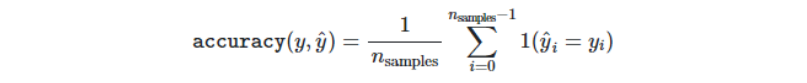
- 내가 추천해준 영화를 고객이 봤나? vs 보지 않았나?
- 내가 추천해주는 영화를 많이 볼수록 추천하지 않은 영화를 보지 않을수록 정확도는 상승
- 하지만, 추천하지 않은 영화의 수는 추천한 영화의 수에 비해 굉장히 많고 편향된 결과를 얻을 수 있다.<br><br>

그래서, 추천해준 영화 중 본 영화로만 평가를 매겨줘야한다. 하지만, 이렇게 해도 문제가 하나 있다. 그러면 모든 상품을 추천해주면 정확도는 무조건 1이 나온다. 상위 n개의 상품만 추천한다고 했을때 어느정도의 정확도를 얻는지 판단하는게 제일 정확한 값을 얻을 수 있다.

---

## F1-Score
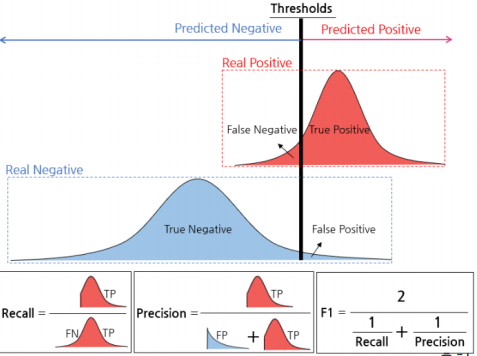

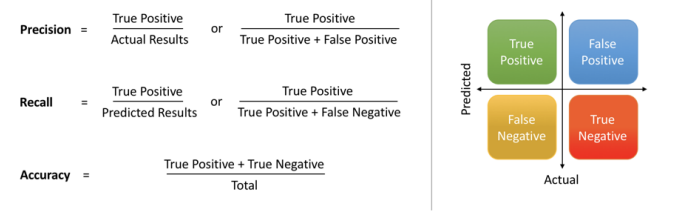
- F1은 Precision과 Recall의 역수를 더한 값을 분모로 2를 분자로 가지는 평가 함수이다.
    - Precision은 실제 본 영화의 수 대비 추천했는데 본 영화의 수를 의미한다.
    - Recall은 실제 추천한 영화의 수 대비 추천했는데 본 영화의 수를 의미한다.<br><br>
- 위 2가지 함수를 함께 봄으로서 추천을 통해 맞춘 영화의 비율과 추천을 안해서 안볼 영화를 맞춘 비율을 적절하게 조절하는 평가 함수이다.

---

## RMSE
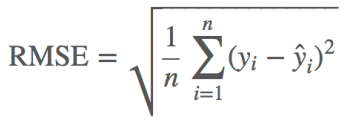
- **Accuracy** : 내가 추천해준 영화를 고객이 봤나? vs 보지 않았나?
- **RMSE** : 추천한 평점이 얼마나 다를지? (영화 추천의 경우 사용자가 5를 평가하는 경우를 얼마나 잘 맞출지)<br>

위의 경우에서 Accuracy와 RMSE의 평가는 굉장히 다르다. Accuracy의 경우 단순 볼까? 안볼까에 대한 평가만 진행하고, 사용자의 반응에 대해서는 크게 궁금해하지 않는다. (예를들어, 영화를 구매하고 보자마자 재미없어서 나간것도 추천에 성공한 것으로 반영된다.) 이러한 반응까지 잘 반영해야 하는게 중요하다.

---

## MAP
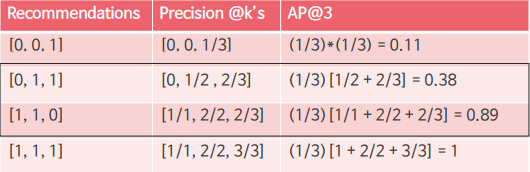
- **Recommendations** : 추천을 했는데 맞은 경우 1, 틀리면 0
- **AP** : Precision @k's를 평균낸 값 (추천한 K개의 영화의 Precision을 평균)
- **MAP@4** : 4명의 사용자의 AP를 평균낸 값 (Precision을 평균낸 AP를 4명의 사용자에 대해 평균)<br>

**MAP**의 경우 추천의 순서에 따라서 값이 차이가 난다. 또한, 상위 k개의 추천에 대해서만 평가하기에 k를 바꿔가면서 상위 몇 개를 추천하는게 좋을지도 결정할 수 있다.

---

## CG
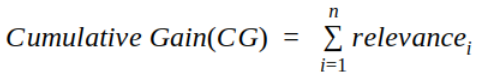
- relevance scores : calculated based on the positive and negative feedback we expect an ad to receive from its target audience

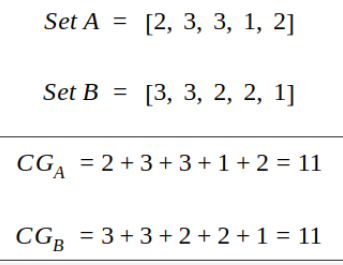
- 눈으로 봤을 때, B가 A보다 나은 추천 결과인것을 알지만 CG의 관점에서는 둘은 서로 동일하다. 이러한 점을 보완하기 위해서 문서의 위치에 따른 Score를 반영해 줄 필요가 있다.

---

## DCG
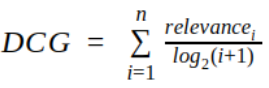

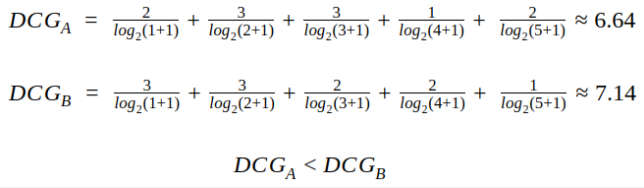<br>
- DCG는 추천 결과의 위치를 고려할 때 좋은 척도로 보이지만 완벽하지는 않다. 그 이유는 다양한 요인에 따라 권장 사항 수가 사용자마다 다를 수 있는데, DCG는 권장 사항의 수에 따라 결과가 달라지기 때문이다. 그에 따라 상한과 하한이 적절한 점수가 필요하므로 모든 추천 점수를 평균하여 최종 점수를 보고 정규화 할 필요가 있다. 이를 반영한게 **NDCG**이다.<br><br>
    - 사람마다 추천해주는 갯수가 다를 수 있으니 이를 반영해줘야 한다.
    - DCG에 Normalize를 수행해서 NDCG를 사용

---

## NDCG
**NDCG (Normalized Discounted Cumulative Gain)** : ranking quality measure, 검색 알고리즘에서 성과를 측정하는 평가 메트릭이다. <br>

추천엔진은 user와 연관있는 documents의 집합을 추천해주기 때문에, 단순히 문서 검색 작업을 수행한다고 생각할 수 있다. (검색과 관련있는 문서들을 추천) 따라서 NDCG를 사용하여 추천 엔진을 평가할 수 있다.

NDCG를 이해하기 위해서는 **Cumulative gain**과 **Discounted Cumulative Gain**을 이해할 필요가 있다.

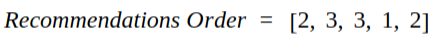

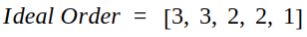

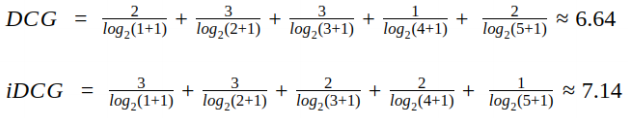

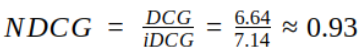